In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [4]:
from numpy import array, dot, transpose
from numpy.linalg import inv

def linear_regression(points):
    X = array(points)
    X = array([[1] + list(p[:-1]) for p in X])
    y = array([p[-1] for p in X])
    
    #print X
    #print y
    
    Xt = transpose(X)
    theInverse = inv(dot(Xt, X))
    w = dot(dot(theInverse, Xt), y)
    return w, lambda x: dot(w,x)

In [5]:
file = "/Users/jeremynixon/Dropbox/python/Ultimate Frisbee/Indoor.csv"
dataset = pd.read_csv(file)
dataset.head()

,Name,Games,Goals,Assists,Ds,Turns,Drops,Point Blocks,Team Goals,Team Number,Team Name
0,Jonah,6,15,16,7,12,2,0,92,1,2nd Anual Joshua Thomas Fries Memorial Indoor ...
1,Mark,7,20,36,14,15,1,2,92,1,2nd Anual Joshua Thomas Fries Memorial Indoor ...
2,Sam Dinnings,6,18,20,10,17,4,0,92,1,2nd Anual Joshua Thomas Fries Memorial Indoor ...
3,Carson Cook,4,13,4,7,6,3,0,92,1,2nd Anual Joshua Thomas Fries Memorial Indoor ...
4,Brian Zid,5,8,12,4,5,1,1,92,1,2nd Anual Joshua Thomas Fries Memorial Indoor ...


In [6]:
df = dataset[['Goals','Assists']]
df[:2]

,Goals,Assists
0,15,16
1,20,36


In [9]:
linear_regression(df)

(array([  2.27595720e-15,   1.00000000e+00]), <function __main__.<lambda>>)

In [17]:
print np.identity(5)

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


In [20]:
len(dataset['Goals'])

107

In [25]:
def ridge_regression(points, lam):
    X = array(points)
    X = array([[1] + list(p[:-1]) for p in X])
    y = array([p[-1] for p in X])
    
    #print X
    #print y
    
    Xt = transpose(X)
    lambda_identity = lam*np.identity(len(Xt))
    theInverse = inv(dot(Xt, X)+lambda_identity)
    w = dot(dot(theInverse, Xt), y)
    return w, lambda x: dot(w,x)

In [26]:
ridge_regression(df, 4)

(array([ 0.00552554,  0.99899288]), <function __main__.<lambda>>)

In [6]:
goals = list(dataset['Goals'])
assists = list(dataset['Assists'])

In [7]:
print goals
print assists

[15, 20, 18, 13, 8, 2, 10, 1, 2, 0, 3, 0, 0, 2, 14, 1, 7, 8, 0, 8, 1, 7, 11, 0, 0, 0, 4, 15, 1, 11, 9, 23, 18, 0, 0, 10, 0, 1, 8, 0, 0, 16, 19, 8, 10, 9, 0, 5, 0, 14, 2, 1, 16, 13, 27, 12, 1, 5, 0, 5, 3, 2, 12, 11, 0, 0, 7, 2, 4, 8, 5, 0, 8, 1, 2, 3, 0, 13, 3, 5, 4, 1, 5, 2, 5, 0, 4, 8, 9, 0, 0, 0, 2, 7, 3, 18, 6, 7, 1, 7, 0, 7, 0, 1, 0, 5, 4]
[16, 36, 20, 4, 12, 0, 0, 1, 0, 0, 1, 0, 0, 4, 13, 0, 4, 5, 1, 15, 12, 4, 1, 0, 0, 0, 4, 35, 4, 14, 27, 5, 4, 0, 0, 4, 0, 1, 2, 0, 0, 15, 3, 5, 7, 5, 0, 14, 0, 21, 0, 0, 29, 13, 13, 17, 6, 3, 0, 4, 15, 6, 7, 6, 0, 0, 13, 3, 3, 14, 7, 0, 2, 0, 4, 8, 0, 0, 1, 3, 9, 0, 4, 5, 4, 1, 15, 2, 1, 0, 0, 0, 2, 1, 6, 10, 8, 15, 7, 10, 0, 1, 0, 3, 0, 2, 2]


In [12]:
def avg(l):
    count = 0
    for i in l:
        count += i
    return count/float(len(l))

In [14]:
print avg(goals)
print avg(assists)

5.69158878505
5.64485981308


In [19]:
avg(goals), avg(assists)

(5.6915887850467293, 5.6448598130841123)

In [20]:
aNumerator = 0
aDenominator = 0
for i in range(len(goals)):
    aNumerator += (assists[i] - avg(assists))*goals[i]
    aDenominator += (goals[i] - avg(goals))*goals[i]
a = float(aNumerator)/aDenominator
print a

0.74457782685


In [21]:
bNumerator = 0
for i in range(len(goals)):
    bNumerator += assists[i] - a*goals[i]
b = float(bNumerator)/len(goals)
print b

1.40702900419


In [30]:
l = np.arange(0,50)

In [31]:
line = []
for i in range(len(l)):
    line.append(a*l[i]+b)

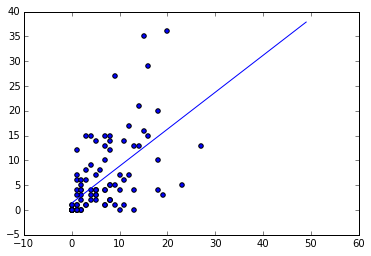

In [33]:
plt.scatter(goals, assists)
plt.plot(line)

In [36]:
average = lambda L: 1.0* sum(L)/len(L)

In [39]:
random.random()

0.1662708946463889

In [41]:
a = 0.5
b = 7.0

points = [(x, a*x + b + (random.random() *0.4 - 0.2)) for x in [random.random() * 10 for _ in range(100)]]

In [60]:
aNum = 0
aDen = 0

for x,y in points:
    xAvg, yAvg = map(avg, zip(*points))
    
    aNum += (y - yAvg)*x
    aDen += (x - xAvg)*x
a = float(aNum)/aDen
b = yAvg - a*xAvg

In [61]:
print a
print b

0.500159094273
7.00105694506


In [1]:
from numpy import array, dot, transpose
from numpy.linalg import inv

def linear_regression(points):
    X = array([[1] + list(p[:-1]) for p in points])
    y = array([p[-1] for p in points])
    
    #print X
    print y
    
    Xt = transpose(X)
    theInverse = inv(dot(Xt, x))
    w = dot(dot(theInverst, Xt), y)
    return w, lambda x: dot(w,x)

In [79]:
print goals

[15, 20, 18, 13, 8, 2, 10, 1, 2, 0, 3, 0, 0, 2, 14, 1, 7, 8, 0, 8, 1, 7, 11, 0, 0, 0, 4, 15, 1, 11, 9, 23, 18, 0, 0, 10, 0, 1, 8, 0, 0, 16, 19, 8, 10, 9, 0, 5, 0, 14, 2, 1, 16, 13, 27, 12, 1, 5, 0, 5, 3, 2, 12, 11, 0, 0, 7, 2, 4, 8, 5, 0, 8, 1, 2, 3, 0, 13, 3, 5, 4, 1, 5, 2, 5, 0, 4, 8, 9, 0, 0, 0, 2, 7, 3, 18, 6, 7, 1, 7, 0, 7, 0, 1, 0, 5, 4]


In [81]:
print assists

[16, 36, 20, 4, 12, 0, 0, 1, 0, 0, 1, 0, 0, 4, 13, 0, 4, 5, 1, 15, 12, 4, 1, 0, 0, 0, 4, 35, 4, 14, 27, 5, 4, 0, 0, 4, 0, 1, 2, 0, 0, 15, 3, 5, 7, 5, 0, 14, 0, 21, 0, 0, 29, 13, 13, 17, 6, 3, 0, 4, 15, 6, 7, 6, 0, 0, 13, 3, 3, 14, 7, 0, 2, 0, 4, 8, 0, 0, 1, 3, 9, 0, 4, 5, 4, 1, 15, 2, 1, 0, 0, 0, 2, 1, 6, 10, 8, 15, 7, 10, 0, 1, 0, 3, 0, 2, 2]


In [82]:
X = [1]*len(goals)

In [84]:
X = np.array(X)

list

In [97]:
X = np.vstack(([1]*len(goals), goals))
print X

[[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1]
 [15 20 18 13  8  2 10  1  2  0  3  0  0  2 14  1  7  8  0  8  1  7 11  0
   0  0  4 15  1 11  9 23 18  0  0 10  0  1  8  0  0 16 19  8 10  9  0  5
   0 14  2  1 16 13 27 12  1  5  0  5  3  2 12 11  0  0  7  2  4  8  5  0
   8  1  2  3  0 13  3  5  4  1  5  2  5  0  4  8  9  0  0  0  2  7  3 18
   6  7  1  7  0  7  0  1  0  5  4]]


In [91]:
y = np.array(assists)
print y

[16 36 20  4 12  0  0  1  0  0  1  0  0  4 13  0  4  5  1 15 12  4  1  0  0
  0  4 35  4 14 27  5  4  0  0  4  0  1  2  0  0 15  3  5  7  5  0 14  0 21
  0  0 29 13 13 17  6  3  0  4 15  6  7  6  0  0 13  3  3 14  7  0  2  0  4
  8  0  0  1  3  9  0  4  5  4  1 15  2  1  0  0  0  2  1  6 10  8 15  7 10
  0  1  0  3  0  2  2]


In [104]:
Xt = transpose(X)
print X.shape
print Xt.shape
print Xt[0]

(2, 107)
(107, 2)
[ 1 15]


In [107]:
product = dot(X,Xt)
print product
print product.shape

[[ 107  609]
 [ 609 7309]]
(2, 2)


In [108]:
inv = inv(product)
print inv

[[ 0.01777558 -0.0014811 ]
 [-0.0014811   0.00026023]]


In [109]:
w = dot(dot(inv, X),y)
print w

[ 1.407029    0.74457783]
